In [172]:
%matplotlib inline
%precision 3

from numpy.random import randn
import numpy as np
import pandas as pd
np.random.seed(123)
import os
import re
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 6

import datetime

from numpy import nan as NA

In [2]:
#!powershell -command "& {gc NCDB_1999_to_2014.csv -head 10}"
!powershell -command "& {gc NCDB_1999_to_2014_s.csv -head 10}"

C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
2013,06,2,12,2,02,21,02,1,1,1,01,02,01,2005,01,M,28,11,2,02,1
2013,06,2,09,2,01,06,02,1,1,1,18,01,11,2008,01,F,42,11,1,02,1
2013,06,2,09,2,01,06,02,1,1,1,18,01,11,2008,02,M,04,12,2,01,2
2013,06,2,09,2,01,06,02,1,1,1,18,01,11,2008,03,F,33,98,2,UU,U
2013,06,2,08,2,02,36,02,1,1,3,01,01,01,2005,01,F,44,11,2,02,1
2013,06,2,08,2,02,36,02,1,1,3,01,02,01,2002,01,M,51,11,1,02,1
2013,06,2,11,2,01,06,02,1,1,2,03,01,01,1997,01,M,45,11,1,02,1
2013,06,2,11,2,01,06,02,1,1,2,03,99,NN,NNNN,01,M,19,99,2,13,3
2013,06,2,11,2,01,06,02,1,1,1,01,01,01,2012,01,F,33,11,1,02,1


In [3]:
#accident = pd.read_csv('NCDB_1999_to_2014.csv', engine = 'python')
accident = pd.read_csv('NCDB_1999_to_2014_s.csv', engine = 'python')

In [4]:
#replace all column head to lower case.

accident.columns = accident.columns.map(lambda x: x[:].lower())
accident

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
0,2013,06,2,12,2,02,21,02,1,1,...,02,01,2005,01,M,28,11,2,02,1
1,2013,06,2,09,2,01,06,02,1,1,...,01,11,2008,01,F,42,11,1,02,1
2,2013,06,2,09,2,01,06,02,1,1,...,01,11,2008,02,M,04,12,2,01,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491545,2014,UU,U,14,2,01,02,01,1,5,...,01,01,2006,01,F,UU,11,2,01,1
491546,2014,UU,U,22,1,01,06,01,2,4,...,01,22,UUUU,01,M,67,12,3,01,U
491547,2014,UU,U,22,1,01,06,01,2,4,...,01,22,UUUU,02,M,10,98,1,01,U


In [5]:
#check the non-numberic values in date-time columns

accident[accident['c_mnth'].str.contains('[^0-9]')|
         accident['c_wday'].str.contains('[^0-9]')|
         accident['c_hour'].str.contains('[^0-9]')]

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
764,2013,06,2,UU,2,02,21,02,1,1,...,01,01,2009,01,F,53,11,2,02,1
765,2013,06,2,UU,2,02,21,02,1,1,...,02,01,2002,01,F,25,11,1,02,1
839,2013,06,2,UU,1,01,04,UU,1,1,...,01,01,2006,01,M,34,11,3,01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491545,2014,UU,U,14,2,01,02,01,1,5,...,01,01,2006,01,F,UU,11,2,01,1
491546,2014,UU,U,22,1,01,06,01,2,4,...,01,22,UUUU,01,M,67,12,3,01,U
491547,2014,UU,U,22,1,01,06,01,2,4,...,01,22,UUUU,02,M,10,98,1,01,U


In [195]:
#remove all special values (unknown to us) in date-time columns, prepare for using date series as index.
#make a copy "df" for further analysis, avoid mess up the original data "accident".

df = accident[:]
df[['c_mnth','c_wday','c_hour']]=df[['c_mnth','c_wday','c_hour']].replace('[^0-9]+',np.nan,regex=True)

#df.isnull().sum().sort_values()
df.dropna(axis=0,subset=['c_mnth','c_wday','c_hour'],inplace=True)
df

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
0,2013,06,2,12,2,02,21,02,1,1,...,02,01,2005,01,M,28,11,2,02,1
1,2013,06,2,09,2,01,06,02,1,1,...,01,11,2008,01,F,42,11,1,02,1
2,2013,06,2,09,2,01,06,02,1,1,...,01,11,2008,02,M,04,12,2,01,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491521,2014,12,7,19,2,01,03,01,1,3,...,01,01,2001,01,F,35,11,2,02,1
491522,2014,12,7,19,2,01,03,01,1,3,...,01,01,2001,02,M,26,13,1,02,2
491523,2014,12,7,19,2,01,03,01,1,3,...,01,01,2001,03,F,15,21,2,02,2


In [335]:
#generate the date-time column "date", and assign it as the index.

df['date'] = pd.DatetimeIndex(df['c_year'].map(str) + '-' + df['c_mnth'] + '-' + df['c_wday'] + ' ' + df['c_hour'] + ':0:0')
df

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user,date
0,2013,06,2,12,2,02,21,02,1,1,...,01,2005,01,M,28,11,2,02,1,2013-06-02 12:00:00
1,2013,06,2,09,2,01,06,02,1,1,...,11,2008,01,F,42,11,1,02,1,2013-06-02 09:00:00
2,2013,06,2,09,2,01,06,02,1,1,...,11,2008,02,M,04,12,2,01,2,2013-06-02 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491521,2014,12,7,19,2,01,03,01,1,3,...,01,2001,01,F,35,11,2,02,1,2014-12-07 19:00:00
491522,2014,12,7,19,2,01,03,01,1,3,...,01,2001,02,M,26,13,1,02,2,2014-12-07 19:00:00
491523,2014,12,7,19,2,01,03,01,1,3,...,01,2001,03,F,15,21,2,02,2,2014-12-07 19:00:00


In [337]:
# this line use 'date' as index, meke 'df' becoming time series.

# df=df.set_index('date')


In [ ]:
# this code to check how many missing values.

# df.isnull().sum().sort_values()


In [198]:
# this code to check detail of missing values.

# df[df['c_vehs'].isnull()]


#### Proposed analytics for each selected category:
1. Category statistics (max, min, mean, etc.)
2. Trend over the whole period (increase, decrease, fluky)
3. Correlation between selected category and one or multiple other categories (as per table below)
The result of analysis for all selected categories will contribute to our recommendations in the conclusion. 
P.S.: We don't need to analyse all categories.

<div markdown style="float:left">

|Correlation combination|Collision date (day of week, hour)|Collision severity|Number of vehicles involved in collision|Collision configuration|Weather condition|Vehicle type|
|:--|:--|:--|:--|:--|:--|:--|
|Road alignment|R|R|R|R||NA|
|Vehicle type|R|R|R|R|R|NA|
|Vehicle model year|R|R|R|R|R|R|


##### Collision level data elements

|Data element|Columns|Column size|Definition|
|--|--|--|--|
|C_YEAR|1 – 4|4|Year|
|C_MNTH|5 – 6|2|Month|
|C_WDAY|7|1|Day of week|
|C_HOUR|8 – 9|2|Collision hour|
|C_SEV|10|1|Collision severity|
|C_VEHS|11 – 12|2|Number of vehicles involved in collision|
|C_CONF|13 – 14|2|Collision configuration|
|C_RCFG|15 – 16|2|Roadway configuration|
|C_WTHR|17|1|Weather condition|
|C_RSUR|18|1|Road surface|
|C_RALN|19|1|Road alignment|
|C_TRAF|20 – 21|2|Traffic control|

##### Vehicle level data elements

|Data element|Columns|Column size|Definition|
|--|--|--|--|
|V_ID|22 – 23|2|Vehicle sequence number|
|V_TYPE|24 – 25|2|Vehicle type|
|V_YEAR|26 – 29|4|Vehicle model year|



##### Person level data elements

|Data element|Columns|Column size|Definition|
|--|--|--|--|
|P_ID|30 – 31|2|Person sequence number|
|P_SEX|32|1|Person sex|
|P_AGE|33 – 34|2|Person age|
|P_PSN|35 – 36|2|Person position|
|P_ISEV|37|1|Medical treatment required|
|P_SAFE|38 – 39|2|Safety device used|
|P_USER|40|1|Road user class|


#### (1) Road Alignment

In [318]:
# slice the columns I would analyse from original dataset.

dfa = df.loc[:,['date','c_year','c_mnth','c_wday','c_hour','c_sev','c_vehs','c_conf','c_wthr','c_raln','v_type','v_year']]
dfa

,date,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_wthr,c_raln,v_type,v_year
0,2013-06-02 12:00:00,2013,06,2,12,2,02,21,1,1,01,2005
1,2013-06-02 09:00:00,2013,06,2,09,2,01,06,1,1,11,2008
2,2013-06-02 09:00:00,2013,06,2,09,2,01,06,1,1,11,2008
...,...,...,...,...,...,...,...,...,...,...,...,...
491521,2014-12-07 19:00:00,2014,12,7,19,2,01,03,1,4,01,2001
491522,2014-12-07 19:00:00,2014,12,7,19,2,01,03,1,4,01,2001
491523,2014-12-07 19:00:00,2014,12,7,19,2,01,03,1,4,01,2001


##### C_RALN

|Code| Description|
|--|:--|
|1| Straight and level|
|2 |Straight with gradient|
|3 |Curved and level|
|4 |Curved with gradient|
|5 |Top of hill or gradient|
|6 |Bottom of hill or gradient "Sag"|
|Q |Choice is other than the preceding values|
|U| Unknown|
|X |Jurisdiction does not provide this data element|

In [319]:
#check how many unknown

dfa['c_raln'].value_counts().sort_index()

1    360937
2     42704
3     28025
      ...  
6      4541
Q       932
U     29119
Name: c_raln, Length: 8, dtype: int64

In [321]:
df1 = dfa.loc[:,['date','c_raln']]
df1

,date,c_raln
0,2013-06-02 12:00:00,1
1,2013-06-02 09:00:00,1
2,2013-06-02 09:00:00,1
...,...,...
491521,2014-12-07 19:00:00,4
491522,2014-12-07 19:00:00,4
491523,2014-12-07 19:00:00,4


In [282]:
#df1 = df1.set_index('date')

In [322]:
# df1.groupby(['date','c_raln']).size().sort_values()
# df1.groupby(['date','c_raln']).size().unstack()

df2 = df1.groupby(['date','c_raln']).size().unstack()

df2

# df2.iloc[:,0].sum()

c_raln,1,2,3,4,5,6,Q,U
date,,,,,,,,
2013-06-02 00:00:00,6.0,4.0,NaN,NaN,NaN,NaN,NaN,11.0
2013-06-02 01:00:00,3.0,2.0,8.0,NaN,NaN,NaN,NaN,NaN
2013-06-02 02:00:00,5.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2014-12-07 21:00:00,63.0,5.0,5.0,6.0,3.0,5.0,NaN,1.0
2014-12-07 22:00:00,76.0,6.0,9.0,5.0,2.0,NaN,NaN,2.0
2014-12-07 23:00:00,37.0,1.0,NaN,2.0,NaN,NaN,NaN,2.0


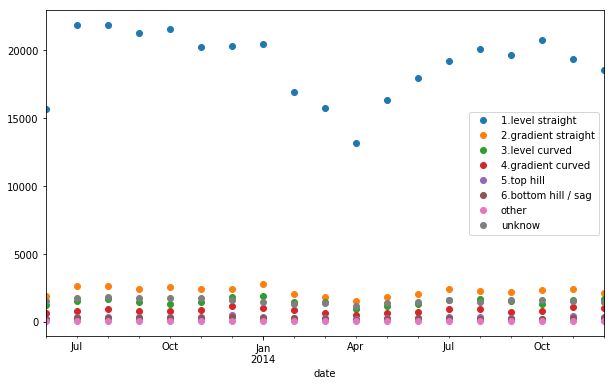

In [334]:
#df2.resample('M').sum().iloc[:,0].sum()

df2 = df2.resample('M').sum()

df2.plot(style = 'o', figsize = (10,6))
plt.legend(['1.level straight','2.gradient straight',
           '3.level curved','4.gradient curved',
           '5.top hill','6.bottom hill / sag',
           'other','unknow']);
